In [28]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
df=pd.read_csv('HR_comma_sep.csv')

In [22]:
df.head(10)

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   
5                0.41             0.50               2                   153   
6                0.10             0.77               6                   247   
7                0.92             0.85               5                   259   
8                0.89             1.00               5                   224   
9                0.42             0.53               2                   142   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   
5                   3              0     1                      0      sales   
6                   4              0     1                      0      sales   
7                   5              0     1                      0      sales   
8                   5              0     1                      0      sales   
9                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low  
5     low  
6     low  
7     low  
8     low  
9     low

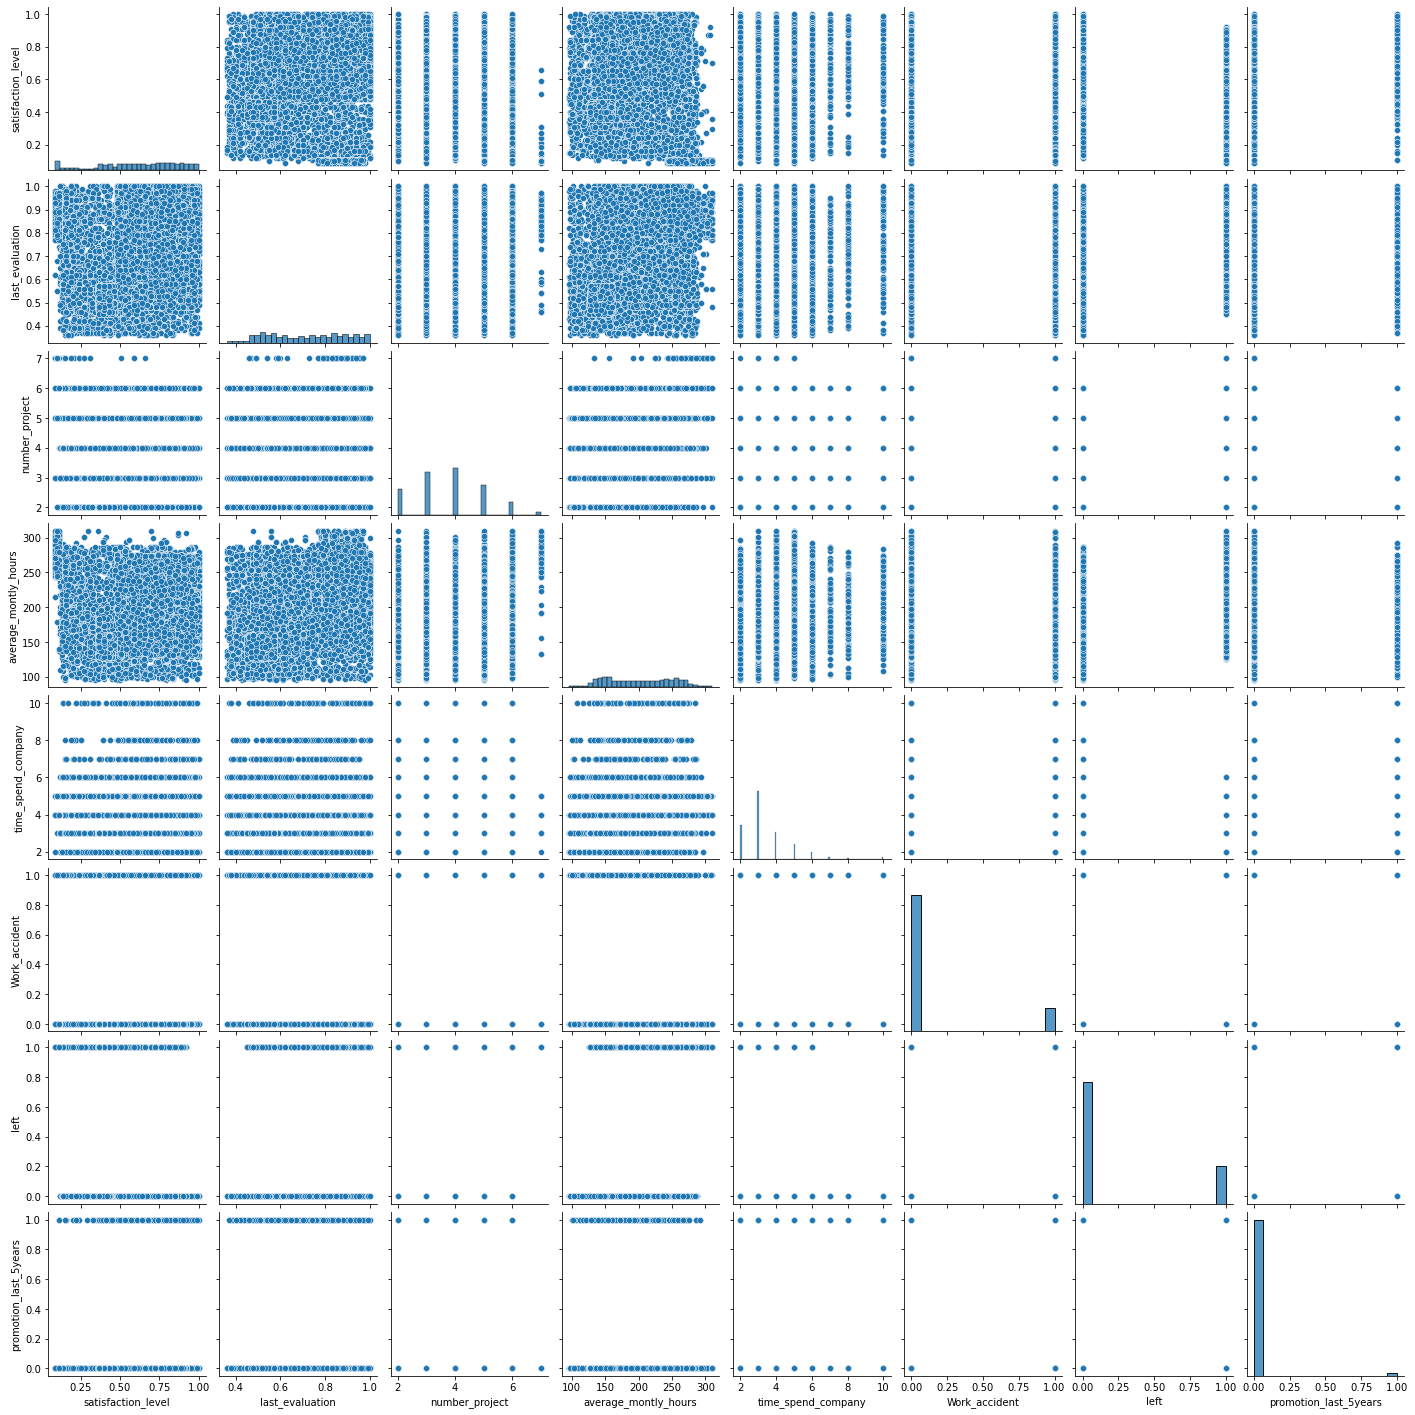

In [29]:
sns.pairplot(df)

In [34]:
left=df[df['left']==1]
left.shape

(3571, 10)

In [35]:
retained=df[df['left']==0]
retained.shape

(11428, 10)

In [37]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [44]:
df1=df[['satisfaction_level','average_montly_hours', 'promotion_last_5years', 'salary']]
df1.head()

satisfaction_level  average_montly_hours  promotion_last_5years  salary
0                0.38                   157                      0     low
1                0.80                   262                      0  medium
2                0.11                   272                      0  medium
3                0.72                   223                      0     low
4                0.37                   159                      0     low

In [50]:
df2=pd.get_dummies(df['salary'])
df2.head()

high  low  medium
0     0    1       0
1     0    0       1
2     0    0       1
3     0    1       0
4     0    1       0

In [51]:
df_with_dummies=pd.concat([df1,df2],axis='columns')
df_with_dummies.head(5)

satisfaction_level  average_montly_hours  promotion_last_5years  salary  \
0                0.38                   157                      0     low   
1                0.80                   262                      0  medium   
2                0.11                   272                      0  medium   
3                0.72                   223                      0     low   
4                0.37                   159                      0     low   

   high  low  medium  
0     0    1       0  
1     0    0       1  
2     0    0       1  
3     0    1       0  
4     0    1       0

In [55]:
df_with_dummies.drop('salary',axis=1,inplace=True)
df_with_dummies.head()

satisfaction_level  average_montly_hours  promotion_last_5years  high  low  \
0                0.38                   157                      0     0    1   
1                0.80                   262                      0     0    0   
2                0.11                   272                      0     0    0   
3                0.72                   223                      0     0    1   
4                0.37                   159                      0     0    1   

   medium  
0       0  
1       1  
2       1  
3       0  
4       0

In [61]:
x=df_with_dummies
x.head()


satisfaction_level  average_montly_hours  promotion_last_5years  high  low  \
0                0.38                   157                      0     0    1   
1                0.80                   262                      0     0    0   
2                0.11                   272                      0     0    0   
3                0.72                   223                      0     0    1   
4                0.37                   159                      0     0    1   

   medium  
0       0  
1       1  
2       1  
3       0  
4       0

In [63]:
y=df.left
y.shape

(14999,)

In [66]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [68]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [69]:
lr.fit(x_train,y_train)

LogisticRegression()

In [75]:
y_pred=lr.predict(x_test)

In [71]:
lr.score(x_test,y_test)

0.773

In [76]:
out=pd.DataFrame({'Actual Value':y_test,"predicted Value":y_pred})

In [78]:
out.head()

Actual Value  predicted Value
5247              0                0
11287             0                0
1533              1                0
1550              1                1
5712              0                0